In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
232,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
233,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
234,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
235,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [8]:
df['Classes'].value_counts()

Classes
fire             130
not fire          96
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
232,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
233,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
234,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
235,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
236,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts()

Classes
1    136
0    101
Name: count, dtype: int64

In [13]:
#Independent and Dependent Features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
232    6.5
233    0.0
234    0.2
235    0.7
236    0.5
Name: FWI, Length: 237, dtype: float64

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape,X_test.shape

((177, 11), (60, 11))

In [17]:
#Feature selection based on feature selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.665057,-0.320582,-0.321505,0.706665,0.527271,0.410766,0.622495,0.498420,0.488489,0.275632
RH,-0.665057,1.000000,0.251415,0.209864,-0.628340,-0.429798,-0.244590,-0.710546,-0.375119,-0.419504,-0.393283
Ws,-0.320582,0.251415,1.000000,0.282649,-0.233315,-0.045997,0.032487,-0.036549,-0.014313,-0.087691,-0.201184
Rain,-0.321505,0.209864,0.282649,1.000000,-0.538166,-0.287163,-0.304660,-0.344581,-0.299653,-0.383898,-0.042606
FFMC,0.706665,-0.628340,-0.233315,-0.538166,1.000000,0.607671,0.513759,0.743102,0.596643,0.775434,0.205298
DMC,0.527271,-0.429798,-0.045997,-0.287163,0.607671,1.000000,0.885816,0.668663,0.983283,0.571227,0.225090
DC,0.410766,-0.244590,0.032487,-0.304660,0.513759,0.885816,1.000000,0.493938,0.943894,0.490785,-0.062637
ISI,0.622495,-0.710546,-0.036549,-0.344581,0.743102,0.668663,0.493938,1.000000,0.632879,0.728498,0.280795
BUI,0.498420,-0.375119,-0.014313,-0.299653,0.596643,0.983283,0.943894,0.632879,1.000000,0.571590,0.118236
Classes,0.488489,-0.419504,-0.087691,-0.383898,0.775434,0.571227,0.490785,0.728498,0.571590,1.000000,0.146211


<Axes: >

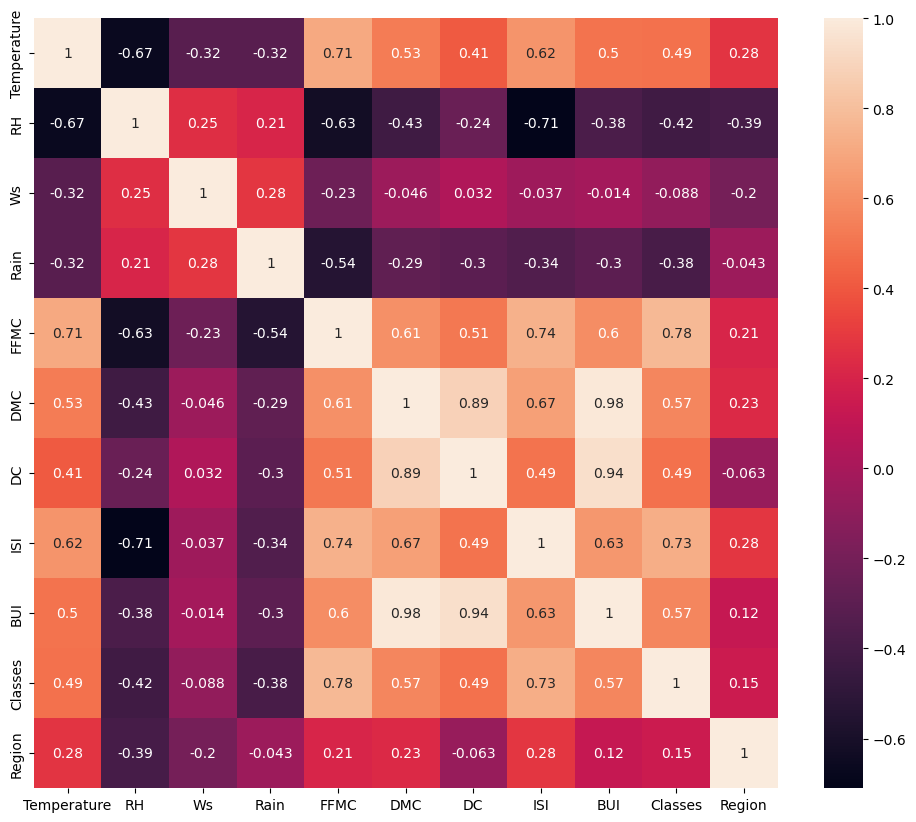

In [18]:
# Check for MultiCollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## threshold --Domain expertise
corr_features=correlation(X_train,0.85)

In [21]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((177, 9), (60, 9))

## Feature Scaling or Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.61780471, -1.41231892, -0.21592777, ...,  0.85323998,
         0.87749644,  1.0286591 ],
       [-0.06412656, -1.0192679 , -0.60198046, ..., -0.71250766,
        -1.13960576, -0.97213937],
       [-0.06412656,  0.81497019, -0.60198046, ...,  0.09408961,
         0.87749644, -0.97213937],
       ...,
       [-2.00200007,  0.8804787 ,  0.5561776 , ..., -1.09208284,
        -1.13960576, -0.97213937],
       [ 1.59690787, -1.80536994, -0.21592777, ...,  2.58505176,
         0.87749644,  1.0286591 ],
       [-0.61780471,  0.9459872 ,  2.10038835, ..., -0.8785718 ,
        -1.13960576, -0.97213937]])

## Box Plots to understand effects of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

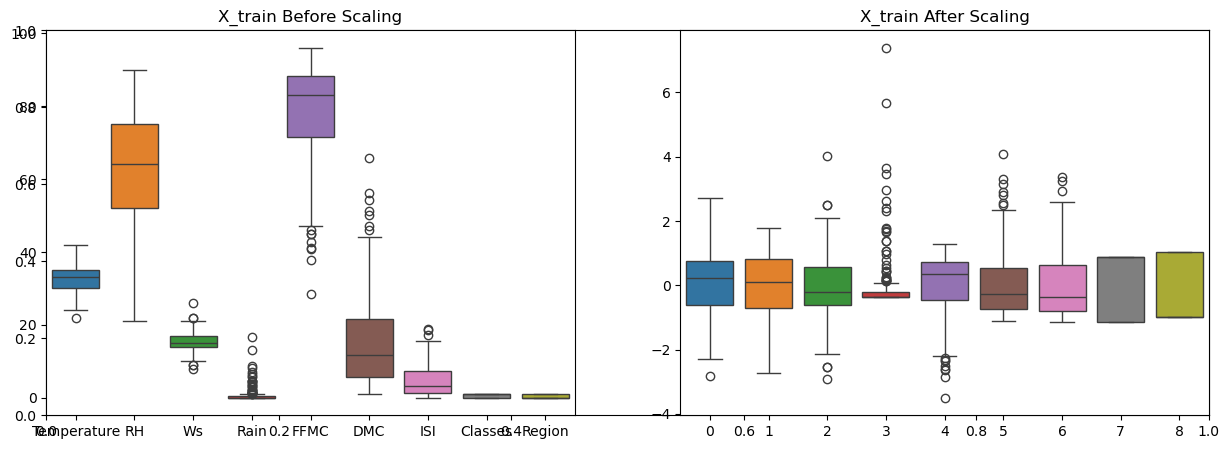

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


Mean absolute error: 0.6661125123746662
R2 Score 0.9824589586293004


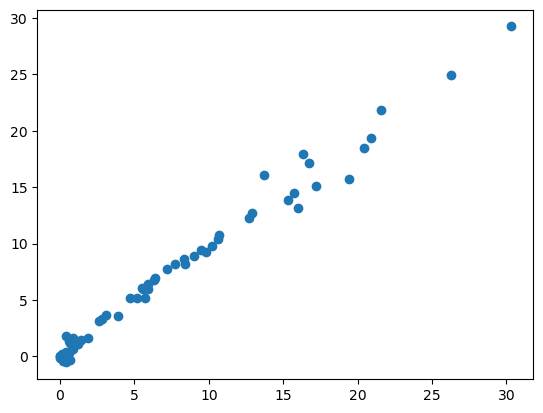

In [26]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error: 1.2610141030522404
R2 Score 0.944211826607573


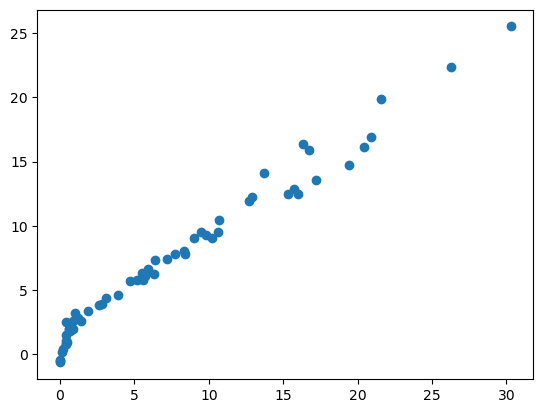

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [28]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [29]:
lassocv.alphas_

array([6.84721439, 6.38573506, 5.95535789, 5.5539867 , 5.17966658,
       4.83057439, 4.50500984, 4.20138726, 3.91822782, 3.65415238,
       3.40787474, 3.17819539, 2.96399565, 2.76423227, 2.57793226,
       2.40418826, 2.24215401, 2.09104034, 1.95011122, 1.81868025,
       1.69610729, 1.58179533, 1.47518762, 1.37576491, 1.28304296,
       1.19657016, 1.11592534, 1.0407157 , 0.97057495, 0.90516145,
       0.84415659, 0.78726326, 0.73420436, 0.68472144, 0.63857351,
       0.59553579, 0.55539867, 0.51796666, 0.48305744, 0.45050098,
       0.42013873, 0.39182278, 0.36541524, 0.34078747, 0.31781954,
       0.29639957, 0.27642323, 0.25779323, 0.24041883, 0.2242154 ,
       0.20910403, 0.19501112, 0.18186802, 0.16961073, 0.15817953,
       0.14751876, 0.13757649, 0.1283043 , 0.11965702, 0.11159253,
       0.10407157, 0.09705749, 0.09051614, 0.08441566, 0.07872633,
       0.07342044, 0.06847214, 0.06385735, 0.05955358, 0.05553987,
       0.05179667, 0.04830574, 0.0450501 , 0.04201387, 0.03918

In [30]:
lassocv.mse_path_

array([[53.72421051, 61.98906183, 35.73805244, 70.16934321, 55.33267504],
       [48.15538213, 57.03740432, 30.81571706, 67.09740555, 49.39072954],
       [43.2413946 , 51.35822039, 26.61658286, 60.62196576, 43.91891295],
       [38.16547059, 46.25017593, 23.04091878, 54.91553049, 39.18575271],
       [33.72322022, 40.74036934, 20.00232611, 49.63906387, 35.09328937],
       [29.83388936, 35.92438818, 17.42608771, 43.91569016, 30.52790325],
       [26.42719098, 31.71333497, 15.24745246, 38.90299319, 26.24159697],
       [23.44168735, 28.02992408, 13.41047583, 34.51153566, 22.54907352],
       [20.82440109, 24.8068349 , 11.86675492, 30.66222837, 19.3703463 ],
       [18.52858699, 21.98542068, 10.57441625, 27.28646683, 16.63583925],
       [16.51368256, 19.51432734,  9.49738488, 24.32444691, 14.28652014],
       [14.74432043, 17.34958054,  8.60443002, 21.72402761, 12.26984038],
       [13.18965753, 15.45208396,  7.86862405, 19.43938932, 10.54067756],
       [11.82260125, 13.78801927,  7.2

Mean absolute error 0.6649075659658562
R2 score 0.9822400155395499


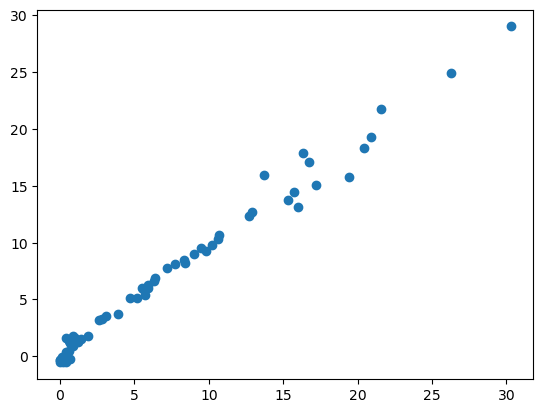

In [31]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)

## Ridge Regression 

Mean absolute error: 0.6785266415810148
R2 Score 0.9819297103404814


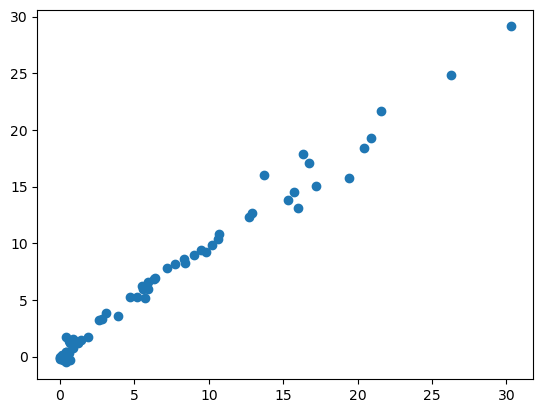

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.8862618689385868
R2 score 0.9740577189628237


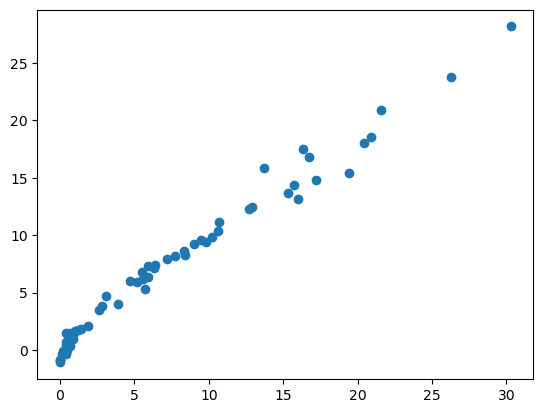

In [33]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)

# ElasticNet Regression

Mean absolute error: 2.075982545590134
R2 Score 0.8681869590882174


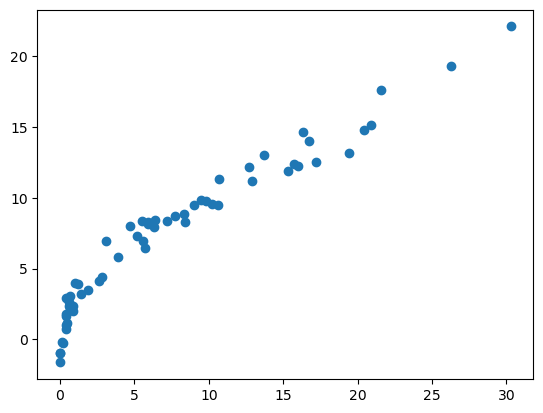

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7617863717643931
R2 score 0.9792996505330458


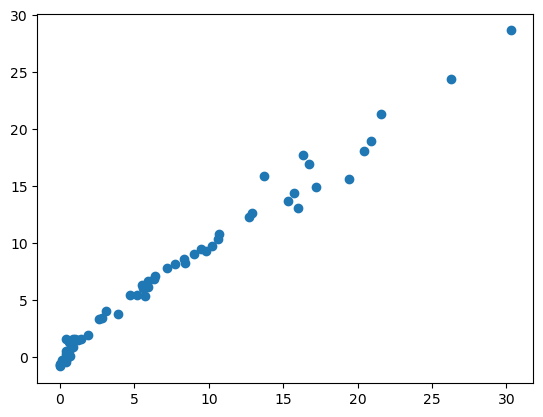

In [35]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)

In [42]:
elasticcv.alphas_

array([13.69442878, 12.77147011, 11.91071577, 11.10797339, 10.35933316,
        9.66114878,  9.01001969,  8.40277452,  7.83645564,  7.30830475,
        6.81574947,  6.35639077,  5.92799131,  5.52846453,  5.15586453,
        4.80837651,  4.48430803,  4.18208068,  3.90022244,  3.6373605 ,
        3.39221457,  3.16359066,  2.95037524,  2.75152983,  2.56608592,
        2.39314032,  2.23185067,  2.08143141,  1.9411499 ,  1.81032289,
        1.68831319,  1.57452653,  1.46840871,  1.36944288,  1.27714701,
        1.19107158,  1.11079734,  1.03593332,  0.96611488,  0.90100197,
        0.84027745,  0.78364556,  0.73083048,  0.68157495,  0.63563908,
        0.59279913,  0.55284645,  0.51558645,  0.48083765,  0.4484308 ,
        0.41820807,  0.39002224,  0.36373605,  0.33922146,  0.31635907,
        0.29503752,  0.27515298,  0.25660859,  0.23931403,  0.22318507,
        0.20814314,  0.19411499,  0.18103229,  0.16883132,  0.15745265,
        0.14684087,  0.13694429,  0.1277147 ,  0.11910716,  0.11

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))